In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import datetime
import time

In [3]:
with open('./dtdo7wfw4y3qxf435kxdha7eaa.json', 'r') as f:
    data = f.read()
    data = data.split('\n')

In [10]:
data_dict = {
    'time': [],
    'mq2': []
}

for line in data:
    if line != '':
        line_json = json.loads(line)
        line_time = int(line_json['Item']['time']['N'])
        line_mq2 = int(line_json['Item']['mq2']['M']['mq2_1']['N'])
        data_dict['time'].append(line_time)
        data_dict['mq2'].append(line_mq2)

df = pd.DataFrame(data_dict)
df2 = df.sort_values(by='time')
time2 = (df2['time'].values - 1706133569420)/1000
dt = []
start_dt = datetime.datetime.strptime('20240125 04:59:45', '%Y%m%d %H:%M:%S')
for t in time2:
    t_dt = start_dt + datetime.timedelta(seconds=t)
    dt.append(t_dt)
df2['time2'] = time2
df2['dt'] = dt

2024-01-27 07:52:19.396630


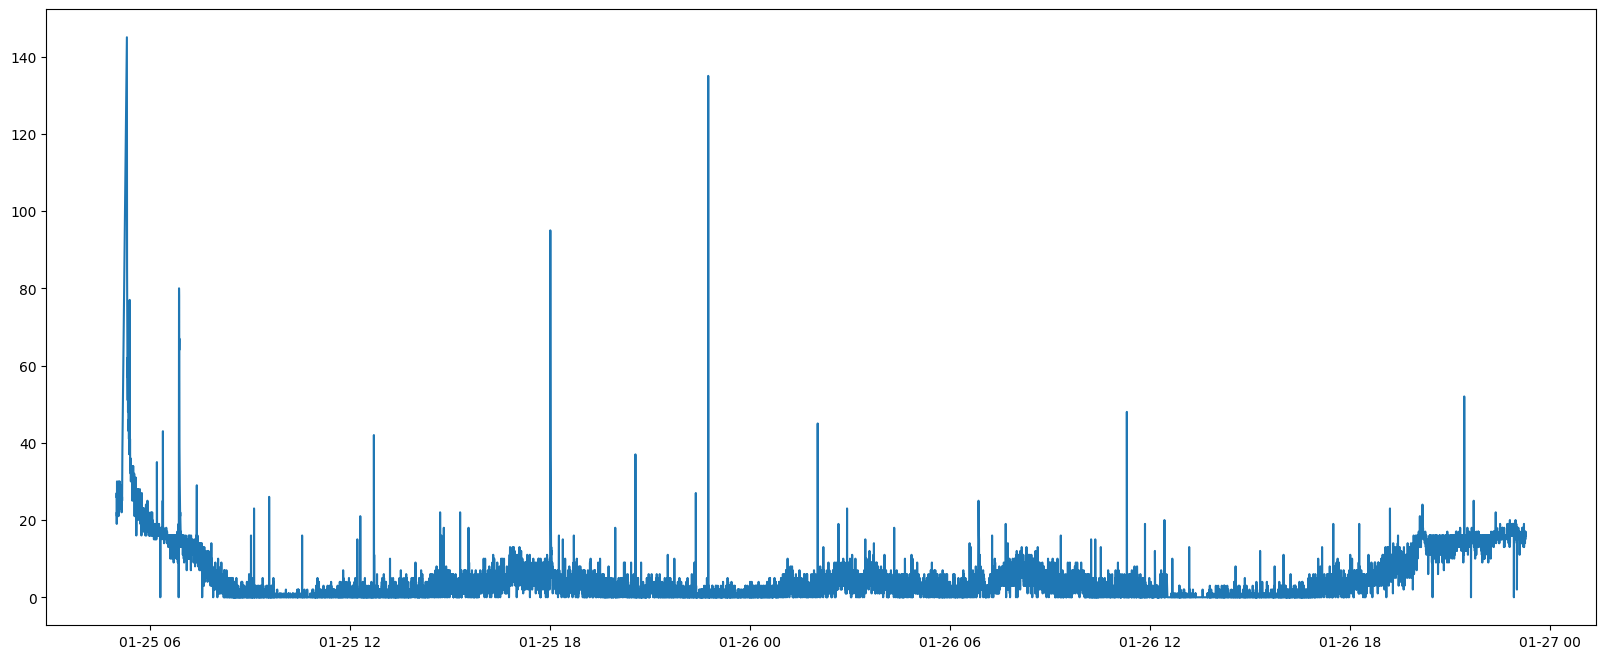

In [13]:
print(datetime.datetime.now())

plt.figure(figsize=(20,8), dpi=100)
plt.plot(df2['dt'], df2['mq2'].values)
#plt.ylim(0,40)
plt.show()

In [9]:
df2['dt']

13796   2024-01-25 04:59:45.707
14812   2024-01-25 04:59:55.718
11790   2024-01-25 05:00:05.720
6870    2024-01-25 05:00:15.721
11903   2024-01-25 05:00:25.729
                  ...          
4073    2024-01-26 23:15:43.992
10825   2024-01-26 23:15:53.991
4427    2024-01-26 23:16:03.964
773     2024-01-26 23:16:14.000
14006   2024-01-25 04:59:35.710
Name: dt, Length: 15168, dtype: datetime64[ns]